In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import svm
import math

rcParams['figure.figsize'] = 6, 4

## Basic SVM Analysis

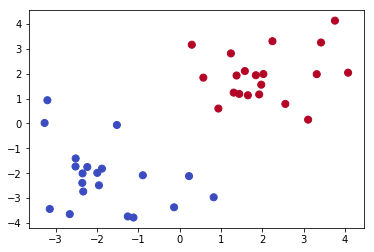

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

In [3]:
#initialize svm model
clf = svm.SVC(kernel='linear',C=10000)

#fit model to x and y data
clf.fit(X, Y)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [4]:
# get the separating hyperplane w[0] x1 + w[1] x2 + intercept = 0
# transform to slope-intercept form: x2 = (-w[0]/w[1])x1 - (intercept/w[1])
weights = clf.coef_[0]
slope = -weights[0] / weights[1]
intercept = (clf.intercept_[0]) / weights[1]
x1 = np.linspace(-3.5, 3.5)
x2 = slope * x1 - intercept

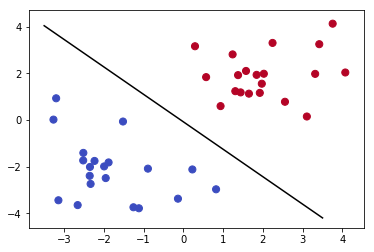

The slope of the hyperplane is -1.1768931608710183 and the intercept is 0.07665041864575753


In [5]:
# plot the line

plt.gca()
plt.plot(x1, x2, 'k-')

plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.axis('tight')
plt.show()
print("The slope of the hyperplane is {} and the intercept is {}".format(slope,intercept))

In [6]:
#reoport support vectors
print("The two support vectors are {} and {}, representing the two points on \
graph in each class closest to the hyperplane".format(clf.support_vectors_[0],
                                                      clf.support_vectors_[-1]))

The two support vectors are [ 0.22627536 -2.11810965] and [ 0.93564585  0.5969359 ], representing the two points on graph in each class closest to the hyperplane


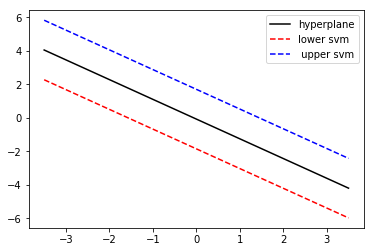

In [31]:
# calculates the hyperplanes based on the svm's slope

b = clf.support_vectors_[0]
x2_down = slope * x1 + (b[1] - slope * b[0]) #calcuate first svm line

b = clf.support_vectors_[-1]
x2_up = slope * x1 + (b[1] - slope * b[0]) #calculate second svm line

plt.gca()
plt.plot(x1, x2, 'k-', label='hyperplane')
plt.plot(x1, x2_down, 'k--', label='lower svm',c='red')
plt.plot(x1, x2_up, 'k--', label=' upper svm',c='blue')
plt.legend()

In [32]:
# your code here
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print("The one directional margin from the hyperplane to the svm is {}".format(margin))

The one directional margin from the hyperplane to the svm is 1.1488996752138219


## Polynomial SVM


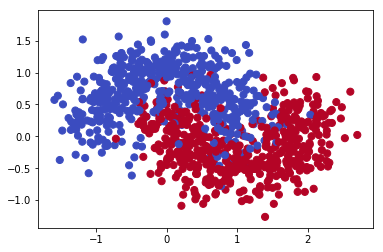

In [33]:
# Visualize data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### Train polynomial SVM

In [35]:
#initialize polynomial classifier and fit it to the training data
poly = svm.SVC(kernel='poly') #using default degree=3

poly.fit(X_train,Y_train)

/nfshome/cb4102/.conda/envs/deeplearn/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
#report accuracy on train and test data sets
print("Accuracy achieved on the training set: {}".format(poly.score(X_train,Y_train)))
print("Accuracy achieved on the test set: {}".format(poly.score(X_test,Y_test)))

Accuracy achieved on the training set: 0.8134328358208955
Accuracy achieved on the test set: 0.8272727272727273


### Next we tune the model using training and validation sets to determine the optimal polynomial factor and penalty factor, C.

In [53]:
#suppress deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

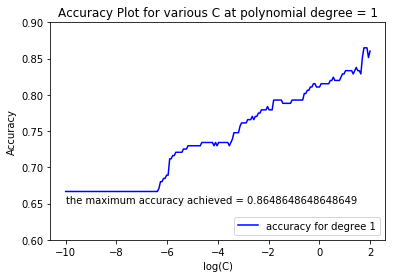

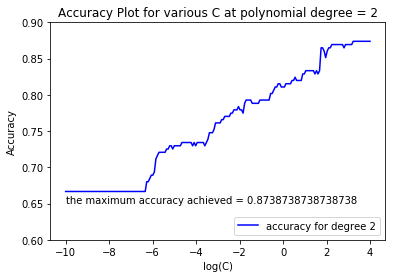

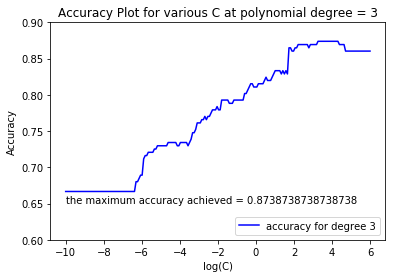

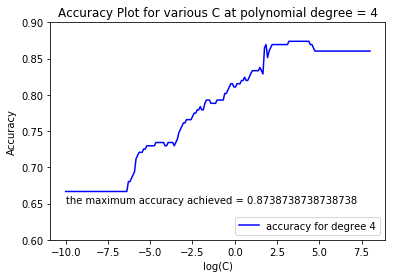

In [63]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, 
                                                     random_state=99)

degree_list = [x for x in range(1,5,1)] #initialize list of polynomial degrees to iterate over

#loop over degrees in degree list and plot accuracy with respect to C

for degree in degree_list:
    val_list = []
    C = [math.exp(x) for x in np.linspace(-10,2*degree,200)] #set C range based on degree
    
    for c in C:
        clf = svm.SVC(kernel='poly',C=c,gamma='auto') 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) 
        val_list.append(correct)
    
    C=[np.log(y) for y in C] # for a better graph
    plt.gca()
    plt.plot(C,val_list,'b',label='accuracy for degree {}'.format(degree))
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.ylim(0.6,0.9)
    plt.title("Accuracy Plot for various C at polynomial degree = {}".format(degree))
    plt.annotate("the maximum accuracy achieved = {}".format(max(val_list)),xy=(-10,0.65))
    plt.show()

In the test case above we achieve the same maximum accuracy for 2, 3, and 4. Since degree=3 performed very well prior to cross validation, I use this as the degree. This graph appears to optimize accuracy at log(c) = 4, implying C=55.

In [84]:
#initialize polynomial classifier and fit it to the training data
poly = svm.SVC(kernel='poly',degree=3,C=55,random_state=99) #using default degree=3

poly.fit(X_train,Y_train)

print("Accuracy achieved on the test set: {}".format(poly.score(X_test,Y_test)))

Accuracy achieved on the test set: 0.8757575757575757


/nfshome/cb4102/.conda/envs/deeplearn/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
